In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv('sample_data/california_housing_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [17]:
import os

print("--- Files in current directory (.): ---")
for root, dirs, files in os.walk('.'):
    for file in files:
        print(os.path.join(root, file))

print("\n--- Files in /kaggle/input (if mounted): ---")
for root, dirs, files in os.walk('/kaggle/input'):
    for file in files:
        print(os.path.join(root, file))


--- Files in current directory (.): ---
./.config/config_sentinel
./.config/gce
./.config/.last_update_check.json
./.config/.last_opt_in_prompt.yaml
./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
./.config/.last_survey_prompt.yaml
./.config/active_config
./.config/default_configs.db
./.config/logs/2025.11.20/14.30.45.231815.log
./.config/logs/2025.11.20/14.30.35.382199.log
./.config/logs/2025.11.20/14.30.45.937471.log
./.config/logs/2025.11.20/14.30.04.285207.log
./.config/logs/2025.11.20/14.30.36.623222.log
./.config/logs/2025.11.20/14.30.27.010422.log
./.config/configurations/config_default
./sample_data/anscombe.json
./sample_data/README.md
./sample_data/california_housing_train.csv
./sample_data/california_housing_test.csv
./sample_data/mnist_train_small.csv
./sample_data/mnist_test.csv

--- Files in /kaggle/input (if mounted): ---


In [12]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [14]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [21]:
df['housing_median_age'].value_counts()

,count
housing_median_age,
52.0,1052
36.0,715
35.0,692
16.0,635
17.0,576
34.0,567
33.0,513
26.0,503
18.0,478


In [23]:
india_cities = ['Bhopal', 'Jaipur', 'Ahmedabad', 'Pune', 'Hyderabad',
                'Chandigarh', 'Delhi', 'Kolkata', 'Goa', 'Mumbai',
                'Chennai', 'Bangalore', 'Kochi', 'Lucknow', 'Indore']

# The following lines caused a KeyError because 'country' and 'city' columns
# do not exist in the current DataFrame (california_housing_train.csv).
# df['country'] = df['country'].mask(
#     df['city'].isin(india_cities) & df['country'].isna(),
#     'India'
# )

print("Columns in current DataFrame:", df.columns.tolist())

Columns in current DataFrame: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [24]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [28]:
# The following code caused a KeyError because the 'agent' column
# does not exist in the current DataFrame (california_housing_train.csv).
# most_frequent_agent = df['agent'].mode()
# if not most_frequent_agent.empty:
#     df['agent'] = df['agent'].fillna(most_frequent_agent[0])
# else:
#     df['agent'] = df['agent'].fillna(0)

df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [29]:
# df['company'].fillna('Unkowns', inplace=True)
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


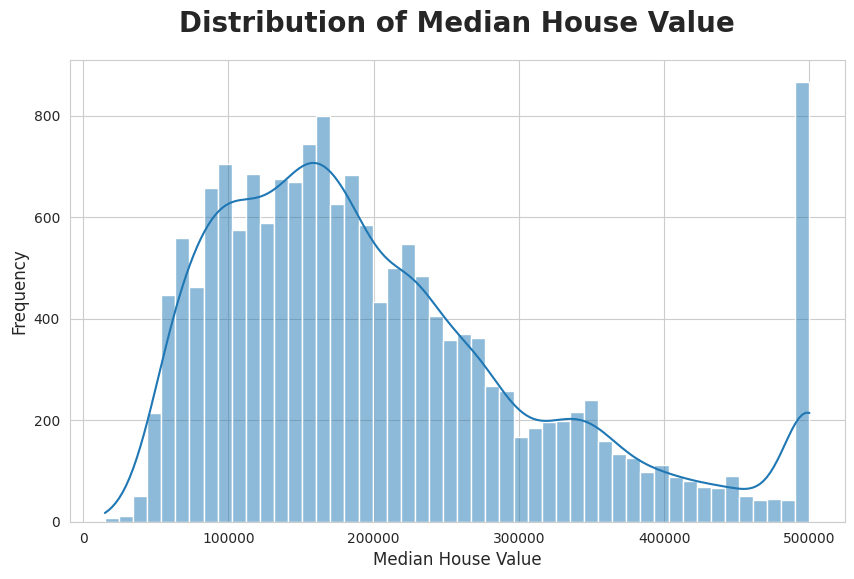

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = (12, 7)
sns.set_style("whitegrid")

# The original code caused a KeyError because 'arrival_date_month' and 'is_canceled'
# do not exist in the current DataFrame (california_housing_train.csv).
# month_order = ['January','February','March','April','May','June',
#                'July','August','September','October','November','December']
# df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

plt.figure(figsize=(10,6))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Value', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Median House Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

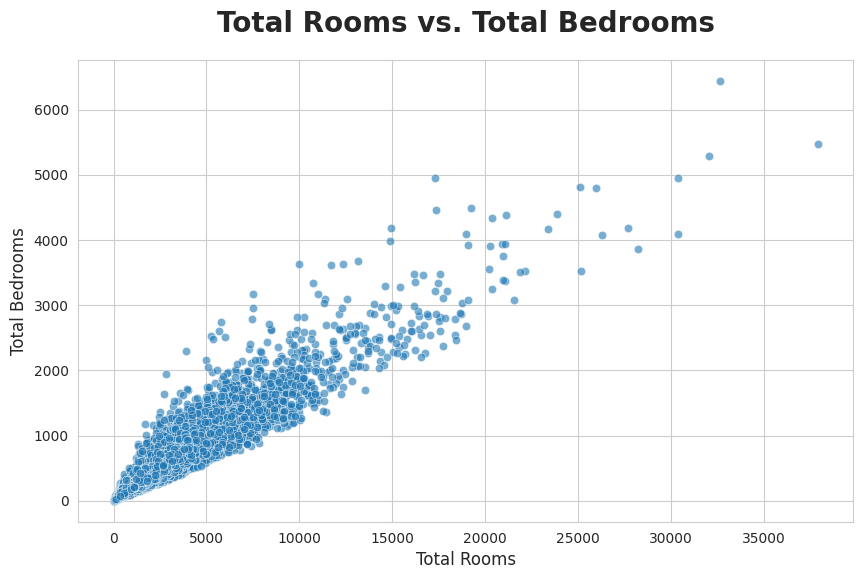

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='total_rooms', y='total_bedrooms', alpha=0.6)
plt.title('Total Rooms vs. Total Bedrooms', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Total Rooms', fontsize=12)
plt.ylabel('Total Bedrooms', fontsize=12)
plt.grid(True)
plt.show()

In [35]:
lm_l = Lasso()
np.mean(cross_val_score(lm_l, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

NameError: name 'Lasso' is not defined

### Data Preparation: Splitting into Features and Target

In [36]:
# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (17000, 8)
Target (y) shape: (17000,)


### Splitting Data into Training and Test Sets

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13600, 8)
y_train shape: (13600,)
X_test shape: (3400, 8)
y_test shape: (3400,)


### Correcting the Lasso Regression Code

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lm_l = Lasso()
np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

np.float64(-51151.71388797272)

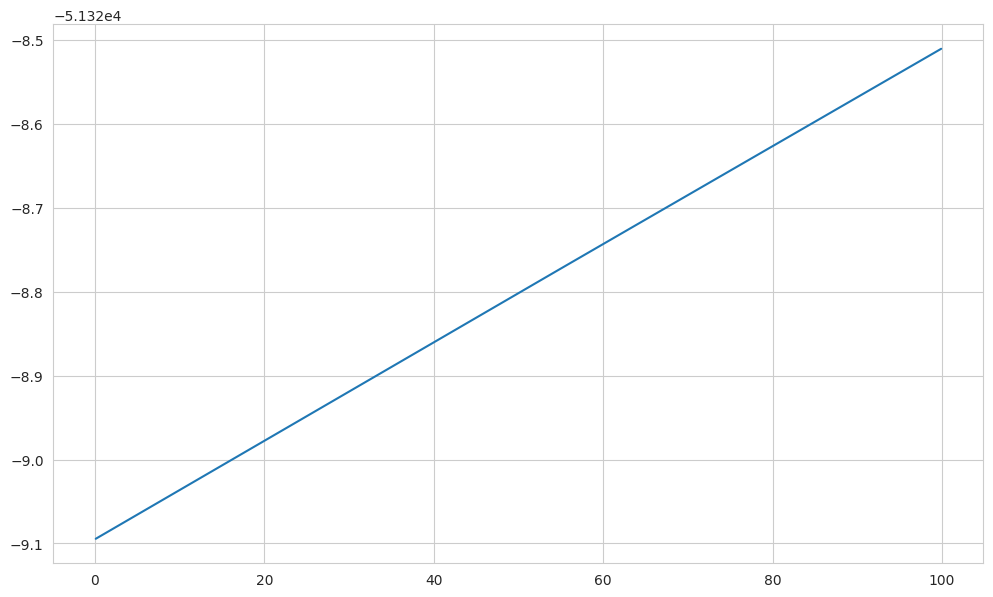

In [40]:
alpha = []
error = []

for i in range(1,1000):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train, y_train, scoring='neg_mean_absolute_error', cv=2)))

plt.plot(alpha,error)

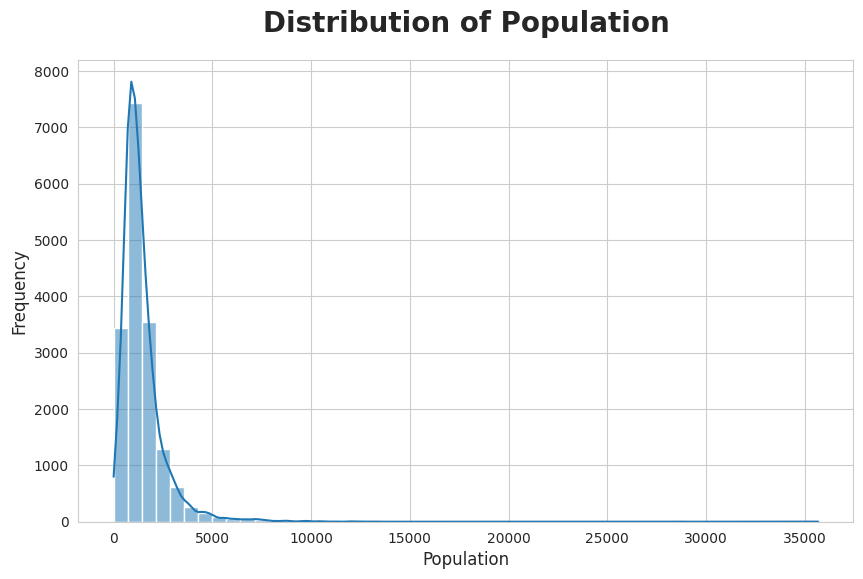

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(df['population'], bins=50, kde=True)
plt.title('Distribution of Population', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()